In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("austin_weather.csv")

# Show first few rows
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
# Check shape and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
# Summary statistics
df.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [5]:
# Drop irrelevant columns
df = df.drop(columns=["Events", "Date"])

In [6]:
# Replace 'T' (trace) and '-' with 0, and convert to numeric
df = df.replace({'T': 0, '-': 0})

In [7]:
# Convert all columns to numeric (if not already)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Check for missing values
df.isnull().sum()

TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
dtype: int64

In [9]:
# Fill missing values with column mean
df = df.fillna(df.mean())

In [10]:
# Confirm all missing values handled
df.isnull().sum()

TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
dtype: int64

In [11]:
# Select features (X) and target (y)
X = df.drop(columns=["PrecipitationSumInches"])
y = df["PrecipitationSumInches"]

In [12]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict on test data
y_pred = model.predict(X_test)

In [15]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.1099654294515274
R² Score: 0.0733179962590963


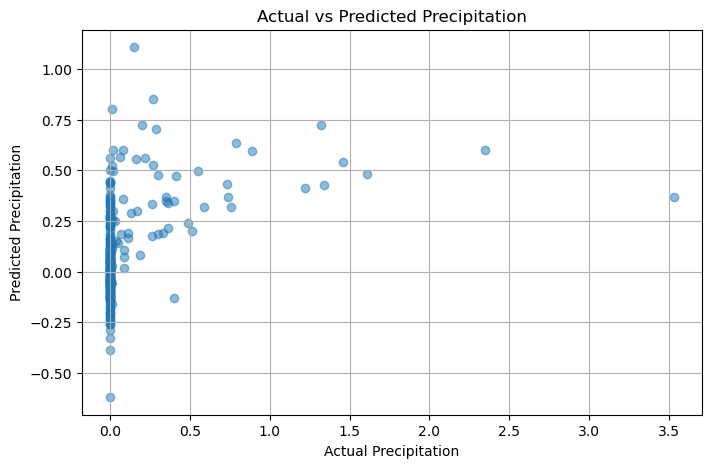

In [16]:
# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.grid(True)
plt.show()

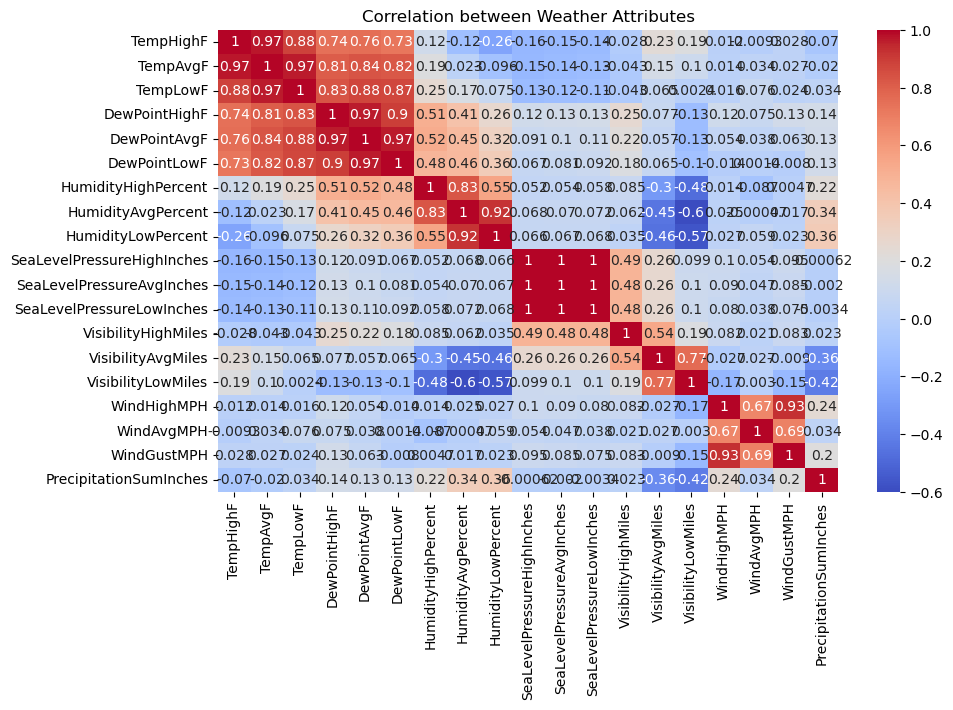

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Weather Attributes")
plt.show()

In [18]:
# Reload dataset with date for trend plot
df_trend = pd.read_csv("austin_weather.csv")
df_trend["Date"] = pd.to_datetime(df_trend["Date"])
df_trend["PrecipitationSumInches"] = df["PrecipitationSumInches"]

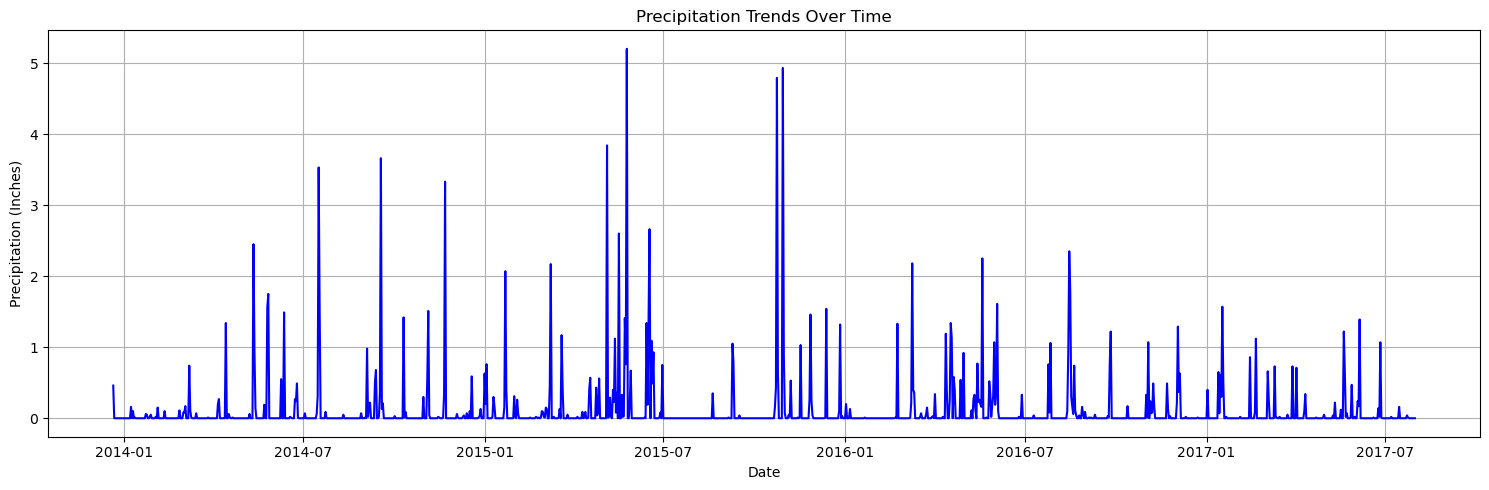

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(df_trend["Date"], df_trend["PrecipitationSumInches"], color='blue')
plt.title("Precipitation Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.grid(True)
plt.tight_layout()
plt.show()